# Deep Learning - Day 2 - Playground Part II

### Exercise objectives:
- Write a full Neural Network on your own
- Better understand Neural Network hyperparameters

<hr>
<hr>

Yesterday, we explore part of the [Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.03295&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&regularizationRate_hide=true) to learn about Neural Network. 

First, as the algorithm is stochastic, the results might differ from one run to the other. For that reason, do not hesitate to rerun the algorithms multiple times to be sure of your deduction and reasonings.

### Let's explore the different things we have seen  during the lectures.


## 1. The batch size

❓ **Question** ❓ Select the circle dataset (classification). Build a model with one hidden layer with 3 neurons, a learning rate of 0.03 and the tanh activation function. Do not put any noise (=0).

❓ **Question** ❓ Select a batch size of 30 and look at the convergence of the algorithm. Does it seem slow or fast?

slow

❓ **Question** ❓ Now, run the same neural network on the same data but with a batch-size of 1? Be sure to run at least 150 epochs. What do you notice on the train and test loss? What is the reason of this instability? 

❓ **Question** ❓ Now, you can see the effect by reading the values of the train and test loss: pause the iterations and run it step by step (iteration per iteration) thanks to the "Step" button (at the right side of the play/stop button).

1 observation is used at each epoch, so the model tries to minimize de loss function for that data point and therefore updates model parameters in a way that does not fit well all data points

❓ **Question** ❓ To observe once again the lack of generalization for small batch sizes, select the "Exclusive or" dataset. Use a noise of 50. Keep the same neural network as before, but with 8 neurons on the hidden layer. Start with a batch size of 30, and then, compare it to a run with a batch size of 1. Look especially at the test loss. What happens?

In [ ]:
# overfitting

❓ **Question** ❓ Change now to the spiral dataset, with a ratio of training to test data of 80%. For the neural network, use 3 hidden layers with 8 neurons on the first layer, 7 on the second and 6 on the third. Run the algorithm with a batch size of 30. Be sure to run it for at least 1500 epochs. Then, compare it to the same run but with a batch size of 1. You can check what happens on the train and test loss step by step.

## 2. The learning rate

Go back to the circle dataset with no noise and a ratio of training to test data of 50%. Use a batch size of 20. 

Use a neural netwok with one layer of 5 neurons (no regularization, and the tanh activation function)

❓ **Question** ❓ For each learning rate (from 0.00001 to 10), run the algorithm during 1000 epochs and report the values of the test loss in the list below. Then, plot the test loss with respect to the learning rates. 

⚠️ Warning ⚠️ When you change the learning rate, be sure to reinitialize the neural network (circular arrow, left to the play/pause button).

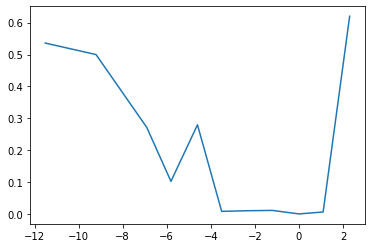

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

learning_rates = [0.00001, 0.0001, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
test_loss = [0.536, 0.5, 0.272, 0.103, 0.28, 0.009, 0.011, 0.012, 0.001, 0.007, 0.62 ] # TO BE COMPLETED

plt.plot(np.log(learning_rates), test_loss)

⚠️ Warning ⚠️ It is important to understand that, even though small and high learning rates have high test loss, this is absolutely not for the same reason. On the one hand, small learning rates do converge as middle learning rate, but way slower. If you would like, you can try to run it all night long to see that it finally converge to the same test loss but with much more epochs. On the other hand, large learning rates make the algorithm diverge.


❓ **Question** ❓ To convince yourself of the lack of convergence of high learning rates, select a learning equal to 10 and run it 10 times, each time with 400 epochs. Report the values in the following list to see the variability of values, which corresponds to the fact that the algorithms converge to different local minima (which is also to be seen on the final prediction which is each time different.

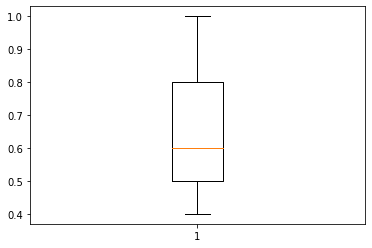

In [2]:
test_loss = [0.6, 1, 0.8, 0.5, 0.4, 0.6, 1, 0.8, 0.5, 0.4] # TO BE COMPLETED

plt.boxplot(test_loss)
plt.show()

❓ **Question** ❓ You can play around with different dataset and make the noise vary. Look at the effect of different learning rate. You can especially change the learning rate _during_ the learning to see how it affects the train and test losses.

## 3. Gaussian data

❓ **Question** ❓ Use the gaussian dataset with a noise of 15, and a ratio of training to test data of 50%. Build any model you want that separates the data.

❓ **Question** ❓ Now, write this model in Keras - do not forget to cimpile it with an optimizer and the appropriate loss.

In [4]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [28]:
model = models.Sequential()
model.add(layers.Dense(5, input_dim = 2, activation ='tanh'))
model.add(layers.Dense(1, activation ='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

❓ **Question** ❓ Let's reproduce this data. Can you plot them?

In [29]:
from sklearn.utils import shuffle

X_1 = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], 300)
X_2 = np.random.multivariate_normal([3, 3], [[1, 0], [0, 1]], 300)
X = np.concatenate((X_1, X_2))

y_1 = [0]*len(X_1)
y_2 = [1]*len(X_2)
y = np.array(y_1 + y_2)

X, y = shuffle(X, y)

In [30]:
len(X[0])

2

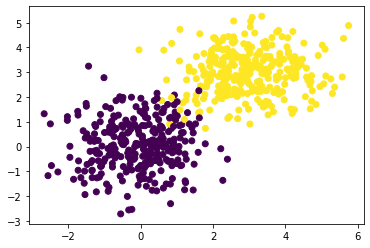

In [31]:
import matplotlib.pyplot as plt
plt.scatter(X.T[0], X.T[1], c=y)

❓ **Question** ❓ Separate the data between test and train set (50/50 ratio)

In [32]:
n_train = int(0.5*len(X))

X_train, X_test = X[:n_train, :], X[n_train:, :]
y_train, y_test = y[:n_train], y[n_train:]

❓ **Question** ❓ Train the model on the train data. Do not forget to choose an appropriate batch_size, which can be the same you use for your Tensorflow Playground Neural network.

In [33]:
history = model.fit(X_train, y_train, 
                    epochs=200,  
                    batch_size = 15, 
                    verbose = 0 )

❓ **Question** ❓ Plot the model loss with respect to the epochs.

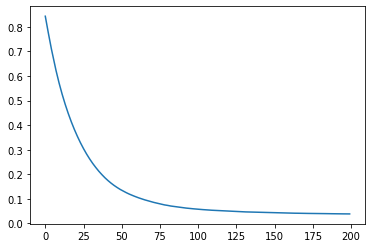

In [34]:
plt.plot(history.history['loss'])

❓ **Question** ❓ Evaluate your score on the test set

In [35]:
results = model.evaluate(X_test, y_test)
print(results)

10/10 [==============================] - 0s 1ms/step - loss: 0.0527 - accuracy: 0.9767
[0.05273808538913727, 0.9766666889190674]


## Congratulation! You are now able to fully write a Neural Network of your own. Easy, no?